<a href="https://colab.research.google.com/github/stellacherotich/Diabetes-Solutions/blob/main/Diabetes_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Solutions Hackathon**


Contributors : Jimcollins Wamae, Rosemary Mburu, and Stella Kitur

### Project Overview


### Problem Statement


### Project Objectives
- At least 1-2 objectives

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)


In [ ]:
#Loading the dataset

df = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( df.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):


        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]



In [ ]:
# creating an instance of the class describer

describe_df = Describer(df)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()


The DataFrame has:
	* 253680 rows
	* 22 columns 

Duplicated rows constitute of 9.42 % of our dataset
Data has 22 Numeric columns
and 0 Categorical columns
*******************
*******************
Numerical Columns: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Categorical Coulumns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             25368

In [ ]:
df.head(20)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
duplicats_age = df[df.duplicated(subset=['Age'])]
duplicats_age.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0


In [ ]:
duplicate_bmi= df[df.duplicated(subset=['BMI'])]

duplicate_bmi.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0


Duplicate values are justified in this case, as there is a chance several people had the same age, bmi etc.

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### <b> Data Cleaning </b>

In [ ]:
# Rename the columns for easy understanding
df.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)
df.head(2)

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


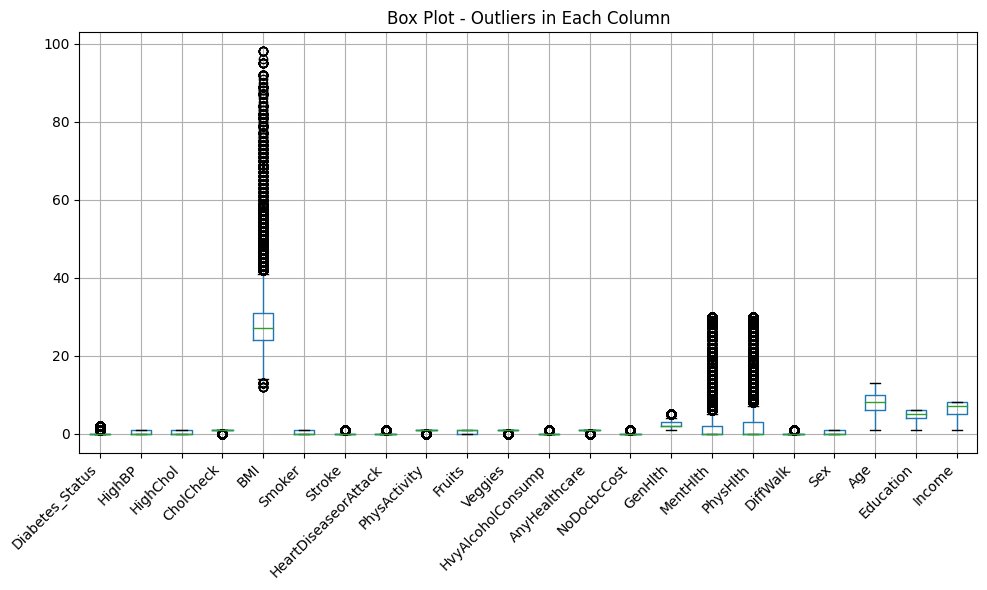

In [ ]:
# Checking for outliers

def plot_outliers(df):

    fig, ax = plt.subplots(figsize=(10, 6))
    df.boxplot(ax=ax)
    ax.set_xticklabels(df.columns, rotation=45, ha='right')
    ax.set_title('Box Plot - Outliers in Each Column')
    plt.tight_layout()
    plt.show()

# Call the function to plot outliers
plot_outliers(df)

In [ ]:
def outliers_drop(df, column_names, z_threshold=3):
    for column_name in column_names:
        # Calculate the z-scores for the specified column
        z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

        # Drop rows where the z-score for the specified column is greater than the threshold
        df = df[z_scores <= z_threshold]

    return df

columns_to_drop_outliers = ['BMI', 'PhysHlth','MentHlth']
data = outliers_drop(df, columns_to_drop_outliers)

# Display the DataFrame without outliers for 'BMI' and 'OtherColumn'
data.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


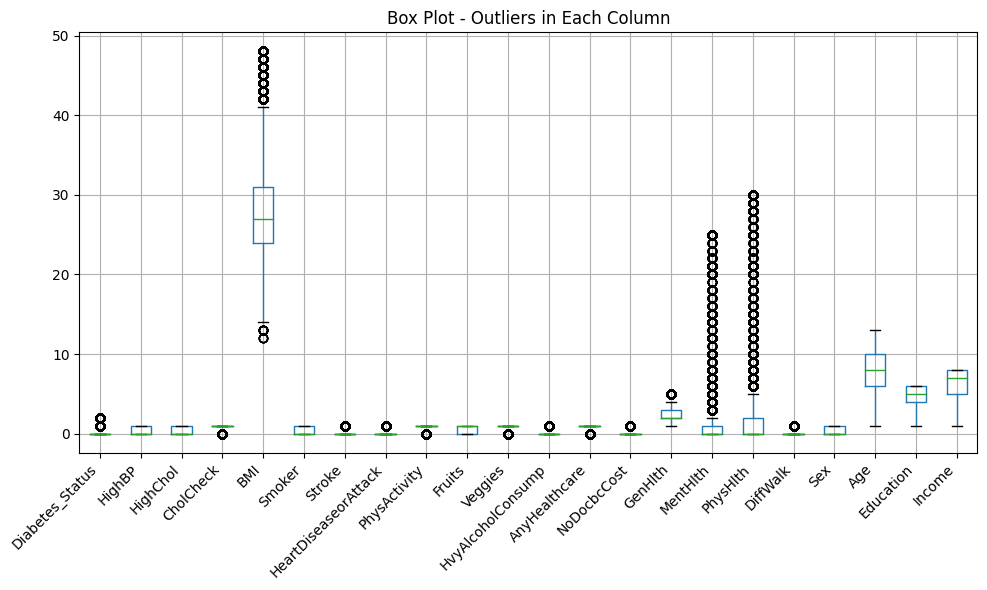

In [ ]:
plot_outliers(data)

## <b> Exploratory Data Analysis</b>


In this section we did bivariate, univariate and multivariate analysis to further understand the data.

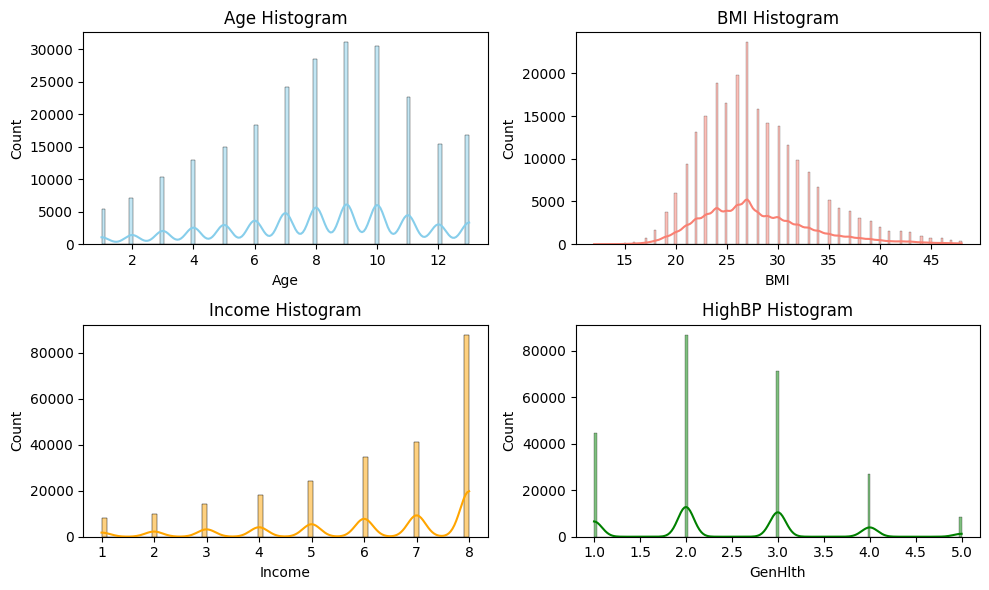

In [ ]:
# Create visualisations for the : Age, BMI, Income, High BP

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Histogram')
plt.subplot(2, 2, 2)
sns.histplot(data['BMI'], kde=True, color='salmon')
plt.title('BMI Histogram')
plt.subplot(2, 2, 3)
sns.histplot(data['Income'], kde=True, color='orange')
plt.title('Income Histogram')
plt.subplot(2, 2, 4)
sns.histplot(data['GenHlth'], kde=True, color='green')
plt.title('HighBP Histogram')
plt.tight_layout()
plt.show()

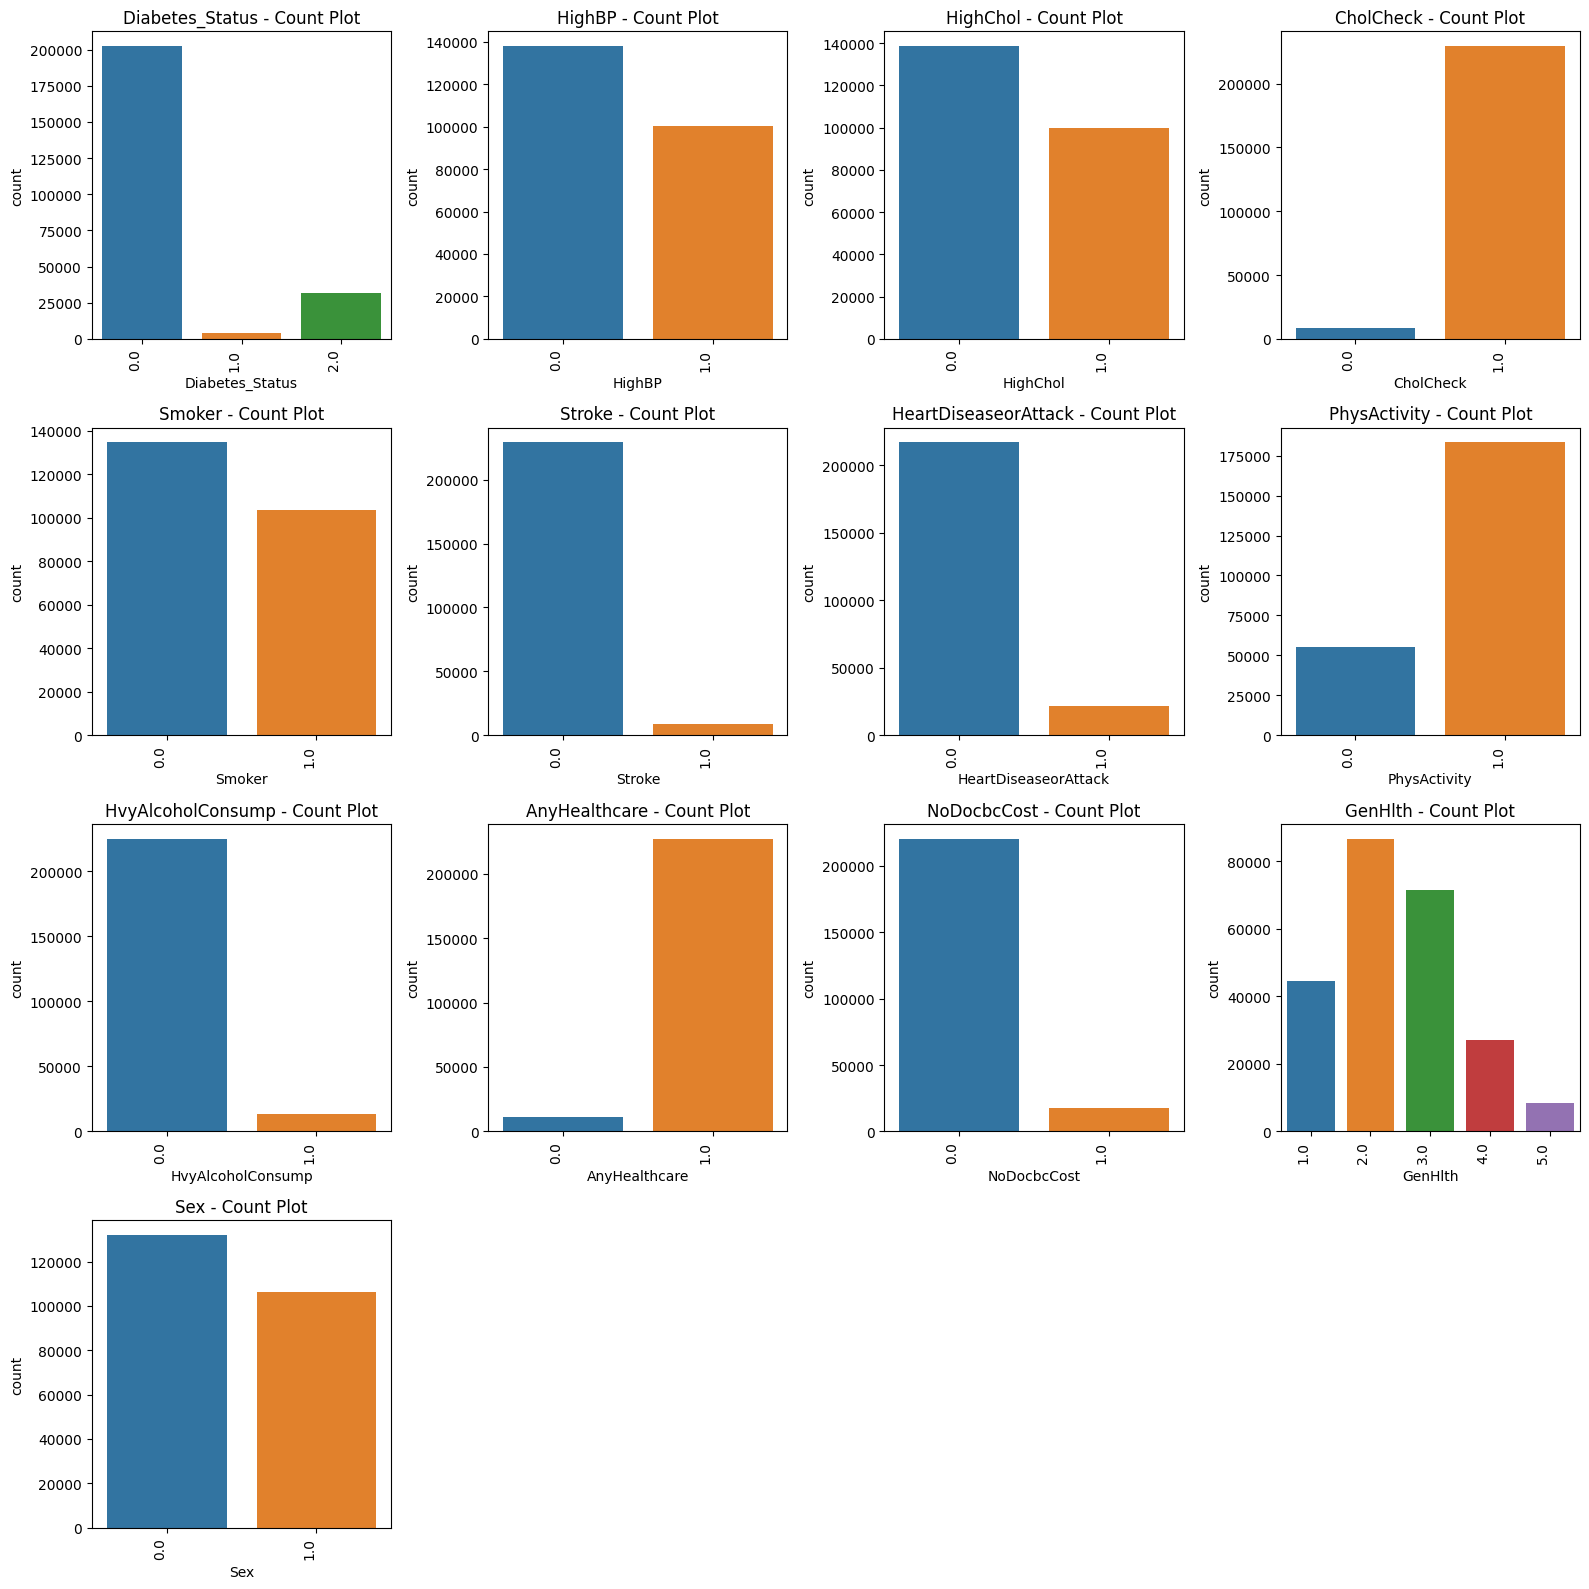

In [ ]:
# Categorical column plots
categorical_columns = ['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
                       'AnyHealthcare', 'NoDocbcCost', 'GenHlth','Sex']

# Bar plots for categorical columns
plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=data)
    plt.title(f'{col} - Count Plot')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

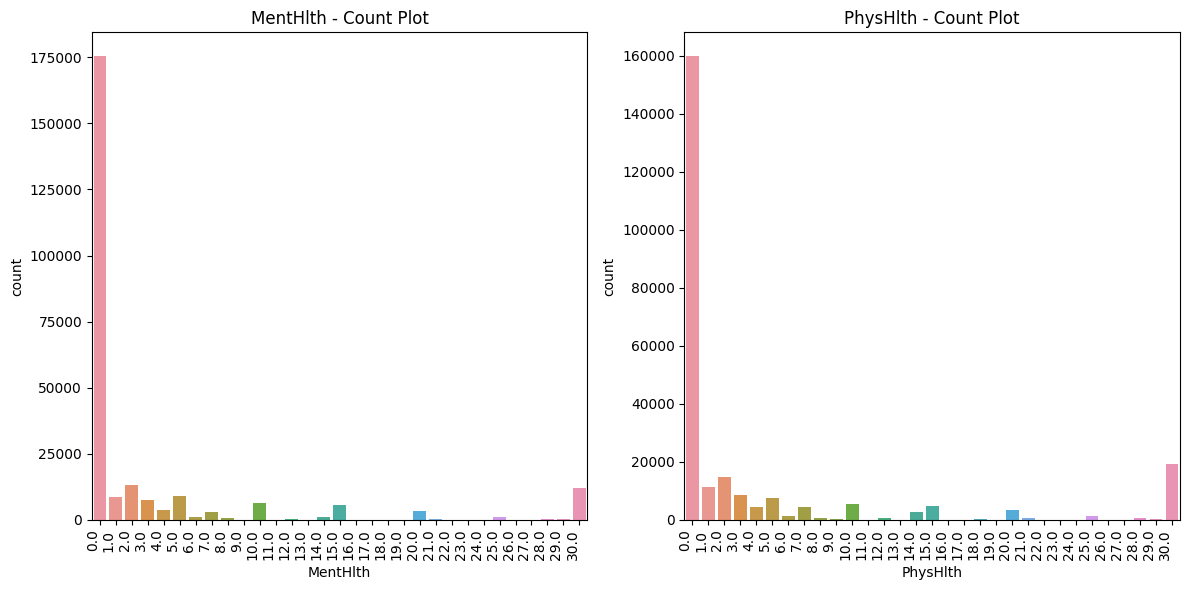

In [ ]:
# Individual bar plots for 'MentHlth' and 'PhysHlth'
columns_to_plot = ['MentHlth', 'PhysHlth']

plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90, ha='right')
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

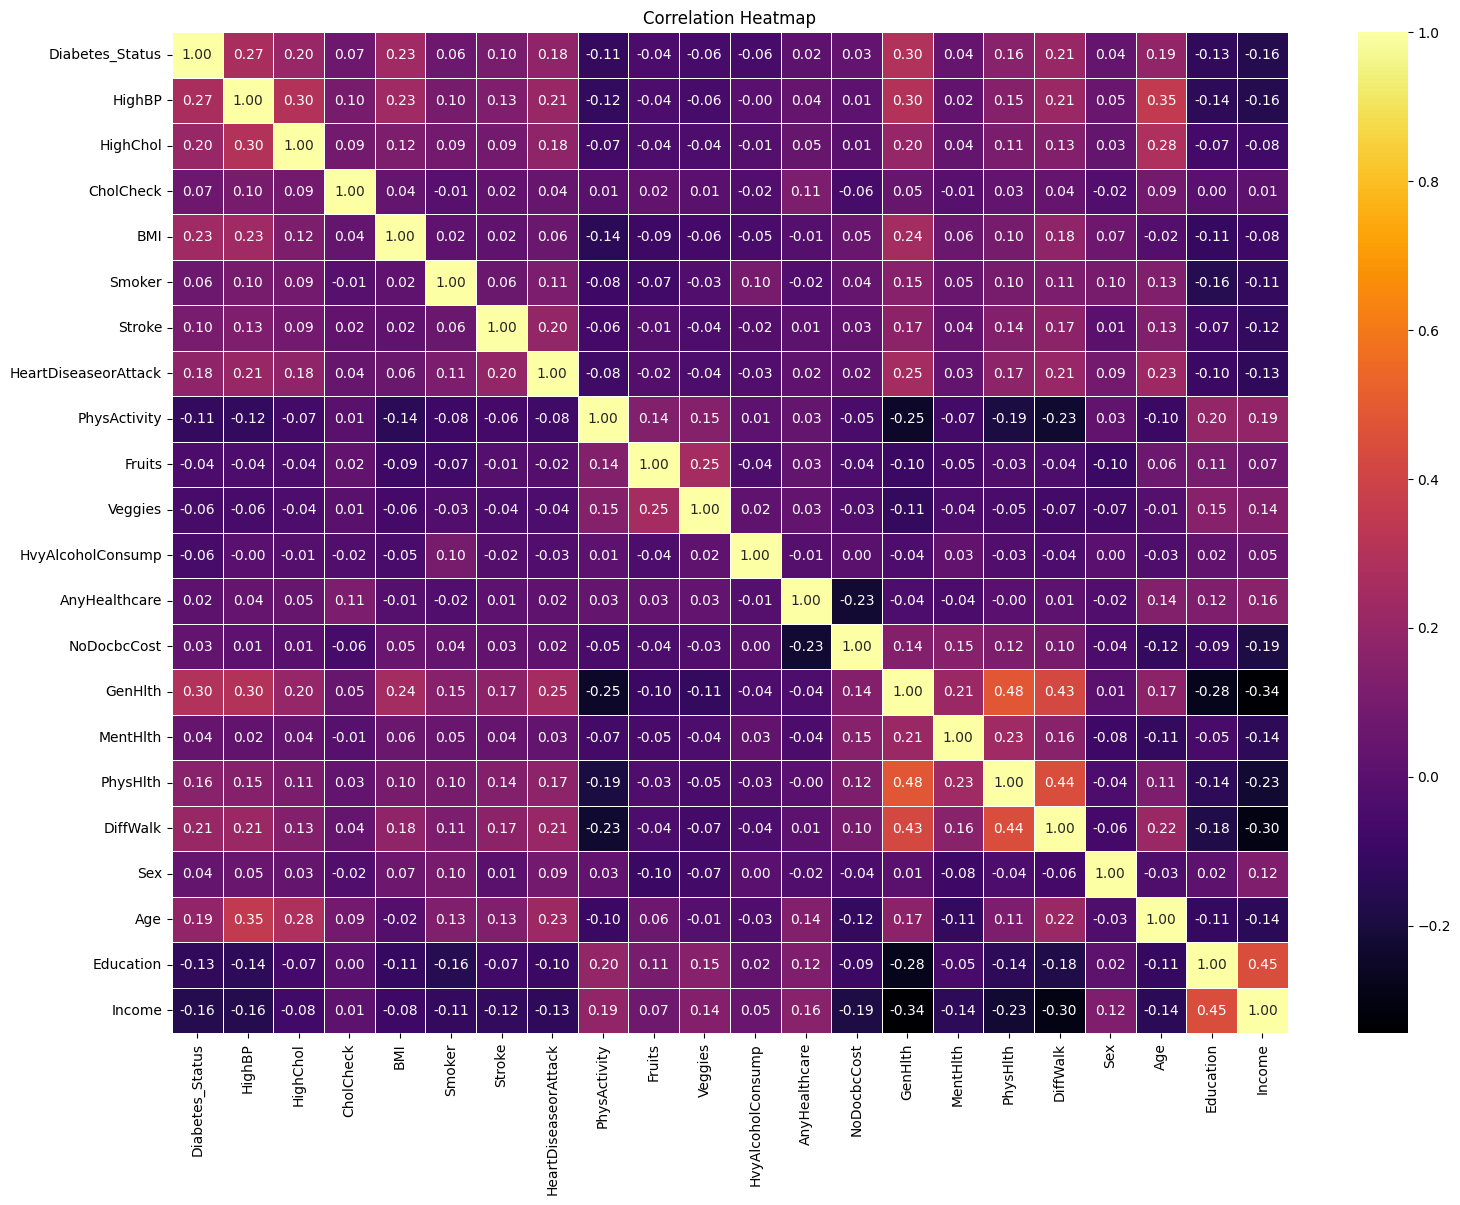

In [ ]:
# Correlation heat map

corr_matrix = data.corr()
plt.figure(figsize=(12, 13))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_Status,1.000000,0.267150,0.202461,0.066093,0.233527,0.061942,0.102678,0.176438,-0.114105,-0.040413,-0.057359,-0.055866,0.017505,0.028540,0.295497,0.039402,0.158722,0.210848,0.036084,0.190289,-0.126776,-0.164220
HighBP,0.267150,1.000000,0.296395,0.098936,0.233343,0.098704,0.127751,0.207289,-0.119129,-0.037126,-0.058521,-0.002997,0.040770,0.010744,0.297367,0.024598,0.148646,0.213925,0.054428,0.351647,-0.137819,-0.164897
HighChol,0.202461,0.296395,1.000000,0.086369,0.122394,0.089334,0.088755,0.178602,-0.071135,-0.038104,-0.035790,-0.010220,0.045216,0.005031,0.201217,0.035974,0.107875,0.134734,0.034482,0.275981,-0.065068,-0.076470
CholCheck,0.066093,0.098936,0.086369,1.000000,0.037126,-0.007906,0.023458,0.044383,0.005380,0.023636,0.005707,-0.022435,0.114581,-0.056268,0.048760,-0.007136,0.032188,0.039374,-0.021740,0.090418,0.001665,0.013289
BMI,0.233527,0.233343,0.122394,0.037126,1.000000,0.020457,0.018506,0.058532,-0.143594,-0.090592,-0.064865,-0.048714,-0.013321,0.051436,0.244681,0.059160,0.101069,0.179875,0.069454,-0.016685,-0.110118,-0.083023
Smoker,0.061942,0.098704,0.089334,-0.007906,0.020457,1.000000,0.058801,0.113751,-0.082372,-0.074102,-0.027621,0.101265,-0.021695,0.039913,0.153153,0.053626,0.101627,0.112763,0.097772,0.129396,-0.158066,-0.114029
Stroke,0.102678,0.127751,0.088755,0.023458,0.018506,0.058801,1.000000,0.195465,-0.063075,-0.010962,-0.038165,-0.015882,0.009938,0.026857,0.168540,0.039149,0.135480,0.169998,0.005911,0.131034,-0.072393,-0.122188
HeartDiseaseorAttack,0.176438,0.207289,0.178602,0.044383,0.058532,0.113751,0.195465,1.000000,-0.081900,-0.017467,-0.036898,-0.028176,0.020975,0.022827,0.253864,0.033189,0.172605,0.205515,0.090012,0.225941,-0.095080,-0.134359
PhysActivity,-0.114105,-0.119129,-0.071135,0.005380,-0.143594,-0.082372,-0.063075,-0.081900,1.000000,0.137796,0.148875,0.012607,0.034511,-0.050264,-0.247249,-0.067952,-0.194332,-0.233932,0.025876,-0.096975,0.196048,0.186927
Fruits,-0.040413,-0.037126,-0.038104,0.023636,-0.090592,-0.074102,-0.010962,-0.017467,0.137796,1.000000,0.250694,-0.035730,0.029562,-0.037418,-0.096601,-0.054779,-0.032864,-0.039081,-0.095792,0.063024,0.106583,0.071413


### **Interpretation**

## Feature Engineering

# Modeling